```markdown
## 1. linear regression
## 2. logistic regression
```

In [ ]:
import torch 
import torch.nn as nn


import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Linear regression**


In [ ]:
"""DATA"""
# let's create sample data
X, y = datasets.make_regression(n_samples=100, 
                                            n_features=1, 
                                            noise=20, 
                                            random_state=4)

# split the data into training and testing .8 and .2
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

print(f"x_train: {X_train.shape} - y_train: {y_train.shape}")
print(f"x_test : {X_test.shape} - y_test : {y_test.shape}")

In [ ]:
# # visualize the data
plt.figure(figsize=(4, 3))
plt.scatter(X_train, y_train, s=3,label="Training Data", color='b')
plt.scatter(X_test, y_test, s=3, label="Testing Data", color='g')
plt.legend()

In [ ]:
# have data to tensors # or to device
X_train = torch.from_numpy(X_train).view(-1, 1).to(dtype=torch.float32)
y_train = torch.from_numpy(y_train).view(-1, 1).to(dtype=torch.float32)
X_test = torch.from_numpy(X_test).view(-1, 1).to(dtype=torch.float32)
y_test = torch.from_numpy(y_test).view(-1, 1).to(dtype=torch.float32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape    

In [ ]:
""" MODEL """
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.block1 = nn.Sequential(
            nn.Linear(input_dim, 32, bias=True),
            nn.ReLU()
        )
        self.linear2 = nn.Linear(32, output_dim, bias=True)
    
    def forward(self, x):
        x = self.block1(x)
        x = self.linear2(x)
        return x

In [ ]:
# model 
input_dim = X_train.shape[1]
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0125)

""" TRAINING """
epochs = 500
for epoch in range(epochs):
    # forward pass
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # inference 
    with torch.no_grad():
        outputs = model(X_test)
        test_loss = loss_fn(outputs, y_test)
        
        if (epoch+1) % 50 == 0:
            print(f"epoch: {epoch+1}, loss: {loss.item():.2f} - Test_loss: {test_loss.item():.2f}")

**Logistic regression**


In [1]:
import torch 
import torch.nn as nn


import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
"""Data"""

n_samples = 1000

# Create circles
X, y = datasets.make_circles(n_samples,
                    noise=0.03, 
                    random_state=42)

X.shape, y.shape

((1000, 2), (1000,))

In [3]:
# #visualize the data
# plt.figure(figsize=(6, 5))
# plt.scatter(x=X[:, 0], 
#             y=X[:, 1], 
#             c=y, 
#             cmap=plt.cm.RdYlBu)

In [4]:
# data to tensors 
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32).view(-1, 1)

In [5]:
# test train splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800, 1]),
 torch.Size([200, 1]))

In [13]:
"""Model"""
class LogisticNetV1(nn.Module):
    def __init__(self):
        super(LogisticNetV1, self).__init__()
        self.linear_1= nn.Linear(in_features=2, out_features=8)
        self.linear_2 = nn.Linear(in_features=8, out_features=1)
    
    def forward(self, x):
        x=self.linear_1(x)
        return self.linear_2(x)
    
class LogisticNetV2(nn.Module):
    def __init__(self):
        super(LogisticNetV2, self).__init__()
        self.linear_1 = nn.Linear(in_features=2, out_features=10)
        self.linear_2 = nn.Linear(in_features=10, out_features=10)
        self.linear_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        x = self.linear_1(x)
        x = torch.relu(x)
        x =self.linear_2(x) 
        x= torch.tanh(x)
        output = self.linear_3(x) 
        return output

In [7]:
# get the model to device if 
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
model = LogisticNetV1().to(device)

model = LogisticNetV1()
model


LogisticNetV1(
  (linear_1): Linear(in_features=2, out_features=8, bias=True)
  (linear_2): Linear(in_features=8, out_features=1, bias=True)
)

In [8]:
next(model.parameters()).device

device(type='cpu')

In [9]:
# # test if model works 
# torch.manual_seed(42)
model = LogisticNetV1().to(device)

sample_X ,  sample_y = X_test[:4] , y_test[:4]

with torch.no_grad():
    y_logits = model(sample_X.to(device))
y_logits  


tensor([[ 0.0311],
        [-0.0110],
        [ 0.2333],
        [-0.0266]])

In [10]:
y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)
# y_pred_labels = torch.round(torch.sigmoid(model(X_test)))

# Check for equality
print(torch.eq(y_preds, sample_y))
print(torch.eq(y_preds, sample_y).sum().item()/len(sample_y))

tensor([[True],
        [True],
        [True],
        [True]])
1.0


In [11]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

In [14]:
"""Training Loop"""
torch.manual_seed(12345)

device = "cuda" if torch.cuda.is_available() else "cpu"

epochs = 1000

# model 
model = LogisticNetV2().to(device)

# Create a loss function
# loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

# data and model to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model.to(device)

for epoch in range(epochs):
    model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits)) 
    
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits,y_train) 
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred) 


    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69473, Accuracy: 48.12% | Test loss: 0.69275, Test acc: 48.00%
Epoch: 100 | Loss: 0.69113, Accuracy: 50.00% | Test loss: 0.68882, Test acc: 53.00%
Epoch: 200 | Loss: 0.68835, Accuracy: 52.75% | Test loss: 0.68572, Test acc: 56.50%
Epoch: 300 | Loss: 0.68498, Accuracy: 52.62% | Test loss: 0.68227, Test acc: 56.50%
Epoch: 400 | Loss: 0.67983, Accuracy: 55.38% | Test loss: 0.67743, Test acc: 60.50%
Epoch: 500 | Loss: 0.67065, Accuracy: 68.50% | Test loss: 0.67011, Test acc: 69.00%
Epoch: 600 | Loss: 0.65380, Accuracy: 74.12% | Test loss: 0.65740, Test acc: 69.00%
Epoch: 700 | Loss: 0.62371, Accuracy: 82.25% | Test loss: 0.63148, Test acc: 77.50%
Epoch: 800 | Loss: 0.56369, Accuracy: 92.62% | Test loss: 0.57930, Test acc: 91.50%
Epoch: 900 | Loss: 0.46497, Accuracy: 98.12% | Test loss: 0.49159, Test acc: 96.00%


**Multi-class classification**

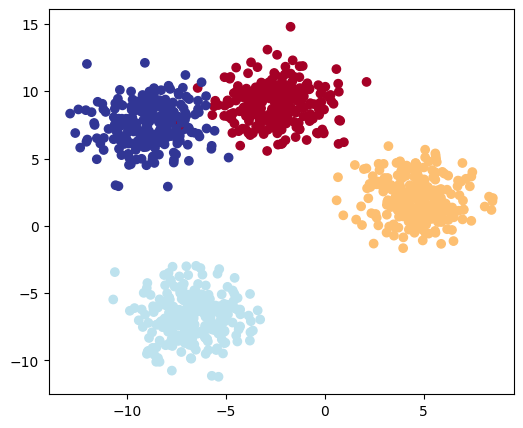

In [15]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
# print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(6, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [16]:
# Create device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
device

'cpu'

In [17]:
"""Model"""

from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features=2, output_features=4, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [18]:
# softmax
# sample forward pass
with torch.no_grad():
    y_logits = model(X_blob_test.to(device))



# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(f"logits: {y_logits[:1]}")
print(f"props: {y_pred_probs[:1]}")
print(f"sum : {torch.sum(y_pred_probs[0]).item()}")
print(f"argmax: {torch.argmax(y_pred_probs[:1], dim=1)}")

logits: tensor([[-0.2139, -0.2127, -0.1436, -0.1448]])
props: tensor([[0.2412, 0.2415, 0.2588, 0.2585]])
sum : 1.0
argmax: tensor([2])


In [20]:
"""Training loop"""
# Fit the model
torch.manual_seed(42)
epochs = 100

model = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


for epoch in range(epochs):

    # 1. Forward pass
    y_logits = model(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.15466, Test Acc: 35.50%
Epoch: 10 | Loss: 1.14903, Acc: 41.88% | Test Loss: 1.14643, Test Acc: 38.50%
Epoch: 20 | Loss: 1.13933, Acc: 45.12% | Test Loss: 1.13826, Test Acc: 42.50%
Epoch: 30 | Loss: 1.12973, Acc: 47.00% | Test Loss: 1.13015, Test Acc: 43.50%
Epoch: 40 | Loss: 1.12021, Acc: 48.88% | Test Loss: 1.12211, Test Acc: 45.00%
Epoch: 50 | Loss: 1.11077, Acc: 50.62% | Test Loss: 1.11412, Test Acc: 46.00%
Epoch: 60 | Loss: 1.10142, Acc: 51.50% | Test Loss: 1.10620, Test Acc: 46.50%
Epoch: 70 | Loss: 1.09217, Acc: 52.50% | Test Loss: 1.09835, Test Acc: 47.50%
Epoch: 80 | Loss: 1.08303, Acc: 53.37% | Test Loss: 1.09058, Test Acc: 47.50%
Epoch: 90 | Loss: 1.07399, Acc: 54.75% | Test Loss: 1.08288, Test Acc: 49.00%
